## Classifying European Money Denominations

------------------------------------------------------------------------------------------------------------------

## Data Description

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| |	|
| |	|
| |	|
| |	|
| |	|
| |	|
| |	|
| |	|
| |	|
| |	|
| |	|
| |	|
| |	|
| |	|
| |	|
| |	|
| |	|
| |	|

## Summary

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import cv2
import os

%matplotlib inline
sns.set_style('darkgrid')
sns.set(font_scale=1.2)


#from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV,StratifiedKFold
#from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report, mean_absolute_error, mean_squared_error,r2_score
# from sklearn.metrics import plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve, accuracy_score
# from sklearn.metrics import auc, f1_score, precision_score, recall_score, roc_auc_score

import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras.models import Sequential, save_model
# from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Activation
# from tensorflow.keras.wrappers.scikit_learn import KerasRegressor, KerasClassifier
# from tensorflow.keras.optimizers import Adam

#For ANN and DNN
import keras
from keras import models
from keras.models import save_model, load_model, Sequential
from keras.layers import Activation, BatchNormalization, Dense, Dropout, Flatten
from keras.optimizers import Adam, Adagrad, RMSprop, SGD
from keras.regularizers import l1,l2,l1_l2

#For Convolutional Neural Networks
from keras.utils.np_utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array, load_img
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D

#For Transfer Learning
from keras.applications.resnet50 import ResNet50
from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19
from keras.applications.inception_v3 import InceptionV3
from keras.applications.xception import Xception
from keras.applications import imagenet_utils

#For Tuning
from keras.callbacks import EarlyStopping, LearningRateScheduler, ModelCheckpoint, ReduceLROnPlateau, TensorBoard

import warnings
warnings.filterwarnings('ignore')


pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)
pd.set_option('display.width', 1000)

np.random.seed(0)
np.set_printoptions(suppress=True)
tf.random.set_seed(0)

## Image Exploration

## Data Exploration

In [2]:
os.getcwd()

'C:\\Users\\Dennis\\Desktop\\DL0320EN'

In [3]:
note100 = cv2.imread('train\\100\\40.jpeg')
note100

array([[[ 13,  11,  11],
        [ 13,  11,  11],
        [ 13,  11,  11],
        ...,
        [196, 191, 188],
        [199, 191, 191],
        [199, 191, 191]],

       [[ 13,  11,  11],
        [ 13,  11,  11],
        [ 13,  11,  11],
        ...,
        [193, 188, 185],
        [196, 188, 188],
        [196, 188, 188]],

       [[ 13,  11,  11],
        [ 13,  11,  11],
        [ 13,  11,  11],
        ...,
        [195, 190, 187],
        [198, 190, 190],
        [198, 190, 190]],

       ...,

       [[ 11,  11,  11],
        [ 11,  11,  11],
        [ 11,  11,  11],
        ...,
        [ 11,  11,  11],
        [ 11,  11,  11],
        [ 11,  11,  11]],

       [[ 11,  11,  11],
        [ 11,  11,  11],
        [ 11,  11,  11],
        ...,
        [ 11,  11,  11],
        [ 11,  11,  11],
        [ 11,  11,  11]],

       [[ 11,  11,  11],
        [ 11,  11,  11],
        [ 11,  11,  11],
        ...,
        [ 11,  11,  11],
        [ 11,  11,  11],
        [ 11,  11,  11]]

In [4]:
note100.shape

(283, 510, 3)

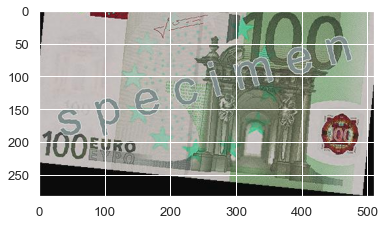

In [5]:
plt.imshow(note100)
plt.show()

In [6]:
note100.max()

255

In [7]:
new100 = cv2.resize(note100,dsize=(112,112))

In [8]:
new100.shape

(112, 112, 3)

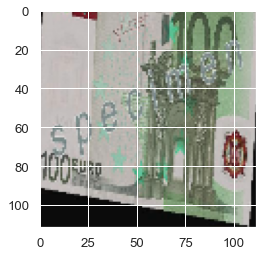

In [9]:
plt.imshow(new100)
plt.show()

In [10]:
note500 = cv2.imread('train\\500\\60.jpeg')
note500 = cv2.cvtColor(note500,cv2.COLOR_BGR2RGB)

In [11]:
note500.shape

(261, 510, 3)

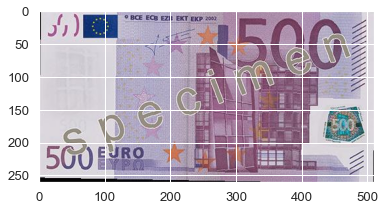

In [12]:
plt.imshow(note500)
plt.show()

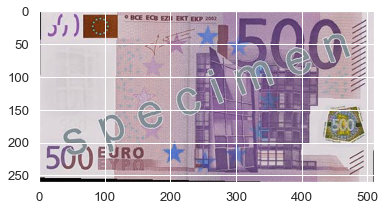

In [13]:
#GreyScale Image
plt.gray()
note500 = cv2.imread('train\\500\\60.jpeg')
plt.imshow(note500)
plt.show()

In [14]:
note500.max()

255

## Convolutional Neural Networks for Image Classification

### Data Preprocessing

#### Preprocessing Training Set

In [15]:
#No Data Augmentation

train_datagen = ImageDataGenerator()

In [ ]:
#Data Augmentation

train_datagen = ImageDataGenerator(rotation_range=30,  # rotate the image 30 degrees
                               width_shift_range=0.1,# Shift the pic width by a max of 10%
                               height_shift_range=0.1,# Shift the pic height by a max of 10%
                               rescale=1./255,# Rescale the image by normalizing it.
                               shear_range=0.2, # Shear means cutting away part of the image (max 20%)
                               zoom_range=0.2, # Zoom in by 20% max
                               horizontal_flip=True,# All horizontal flipping
                               fill_mode= "nearest" # Fill in missing pixels with the nearest filled value
                                )

In [16]:
batch_size = 5
target_size = (112,112)
classes = ['5','10','20','50','100','200','500']
train_data_dir = 'train'
random_seed = 0

In [17]:
os.listdir(train_data_dir)

['10', '100', '20', '200', '5', '50', '500']

In [18]:
train_generator = train_datagen.flow_from_directory(train_data_dir, target_size=target_size, classes=classes,
                                                    batch_size=batch_size, seed=random_seed,shuffle=True,
                                                    class_mode='categorical', color_mode='rgb')

Found 70 images belonging to 7 classes.


In [19]:
len(train_generator)

14

In [20]:
train_generator.class_indices

{'5': 0, '10': 1, '20': 2, '50': 3, '100': 4, '200': 5, '500': 6}

In [21]:
train_images, train_labels = next(train_generator)

In [22]:
train_images.shape

(5, 112, 112, 3)

In [23]:
train_labels.shape

(5, 7)

In [24]:
train_labels

array([[0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

In [25]:
label_names = {0:'5', 1:'10',2:'20',3:'50',4:'100',5:'200',6:'500'}

#### Preprocessing Validation Set

In [26]:
batch_size = 5
target_size = (112,112)
classes = ['5','10','20','50','100','200','500']
valid_data_dir = 'validation'
random_seed = 0

In [27]:
#No Data Augmentation

valid_datagen = ImageDataGenerator()

In [ ]:
valid_datagen = ImageDataGenerator(rescale=1./255)

In [28]:
valid_generator = valid_datagen.flow_from_directory(valid_data_dir, target_size=target_size, classes=classes,
                                                    batch_size=batch_size, seed=random_seed,
                                                    class_mode='categorical', color_mode='rgb')

Found 70 images belonging to 7 classes.


In [29]:
len(valid_generator)

14

In [30]:
valid_generator.class_indices

{'5': 0, '10': 1, '20': 2, '50': 3, '100': 4, '200': 5, '500': 6}

#### Preprocessing Test Set

In [31]:
batch_size = 5
target_size = (112,112)
classes = ['5','10','20','50','100','200','500']
test_data_dir = 'test'
random_seed = 0

In [32]:
#No Data Augmentation

test_datagen = ImageDataGenerator()

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [33]:
test_generator = test_datagen.flow_from_directory(test_data_dir, target_size=target_size, classes=classes,
                                                    batch_size=batch_size, seed=random_seed,
                                                    class_mode='categorical', color_mode='rgb')

Found 70 images belonging to 7 classes.


In [34]:
len(test_generator)

14

In [35]:
test_generator.batch_size

5

## Visualize Dataset

### Plot out the images in the first batch

In [36]:
first_batch = test_generator.next()[0]
first_batch

array([[[[177., 182., 186.],
         [187., 198., 200.],
         [185., 202., 212.],
         ...,
         [  7.,   8.,  10.],
         [  7.,   8.,  10.],
         [  0.,   0.,   2.]],

        [[183., 188., 194.],
         [166., 177., 179.],
         [161., 178., 188.],
         ...,
         [185., 190., 194.],
         [185., 190., 194.],
         [183., 188., 192.]],

        [[191., 200., 207.],
         [178., 189., 191.],
         [160., 174., 183.],
         ...,
         [178., 188., 197.],
         [178., 188., 197.],
         [180., 190., 199.]],

        ...,

        [[  2.,   3.,   5.],
         [  2.,   3.,   5.],
         [  2.,   3.,   5.],
         ...,
         [177., 188., 194.],
         [  3.,   3.,   1.],
         [  3.,   3.,   1.]],

        [[  3.,   3.,   3.],
         [  3.,   3.,   3.],
         [  3.,   3.,   3.],
         ...,
         [180., 191., 197.],
         [  3.,   3.,   1.],
         [  3.,   3.,   1.]],

        [[  3.,   3.,   3.],
       

In [37]:
type(first_batch)

numpy.ndarray

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


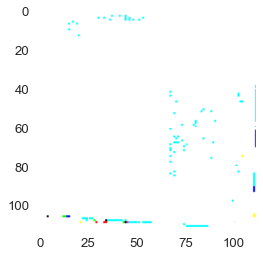

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


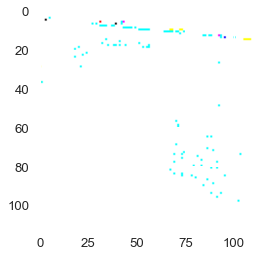

In [38]:
for image in range(0,2):
    plt.imshow(first_batch[image])
    plt.show()

In [39]:
first_batch_valid = valid_generator.next()[0]
first_batch_valid

array([[[[234., 235., 237.],
         [254., 255., 255.],
         [253., 254., 255.],
         ...,
         [249., 255., 255.],
         [  1.,   0.,   0.],
         [  0.,   0.,   0.]],

        [[245., 251., 251.],
         [243., 249., 249.],
         [249., 255., 255.],
         ...,
         [245., 254., 251.],
         [  5.,   3.,   4.],
         [  0.,   0.,   0.]],

        [[239., 251., 249.],
         [247., 255., 255.],
         [244., 255., 254.],
         ...,
         [245., 254., 251.],
         [  2.,   0.,   1.],
         [  0.,   0.,   0.]],

        ...,

        [[  0.,   0.,   0.],
         [  0.,   0.,   0.],
         [  0.,   0.,   0.],
         ...,
         [  0.,   0.,   0.],
         [  0.,   0.,   0.],
         [  0.,   0.,   0.]],

        [[  0.,   0.,   0.],
         [  0.,   0.,   0.],
         [  0.,   0.,   0.],
         ...,
         [  0.,   0.,   0.],
         [  0.,   0.,   0.],
         [  0.,   0.,   0.]],

        [[  0.,   0.,   0.],
       

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


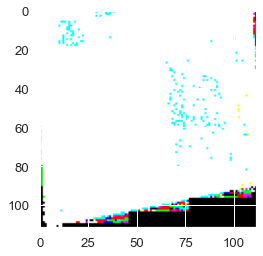

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


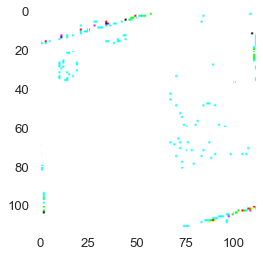

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


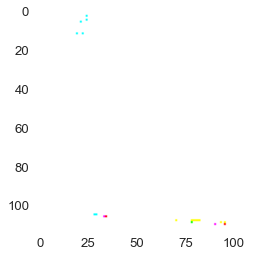

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


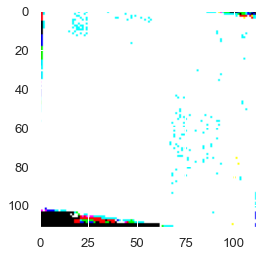

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


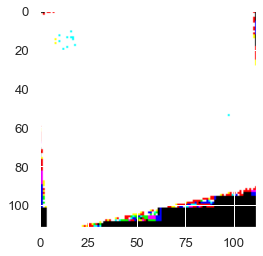

In [40]:
for image in range(0,5):
    plt.imshow(first_batch_valid[image])
    plt.show()

### Plot all images

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


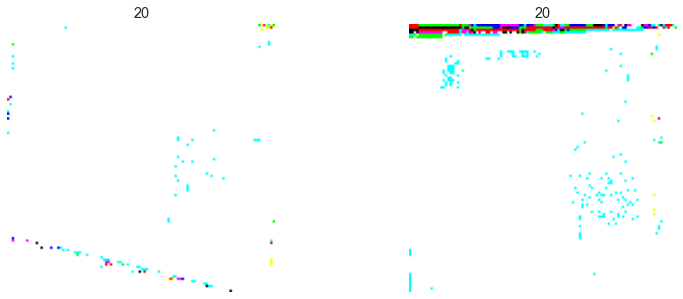

In [41]:
L = 1
W = 2

fig, axes = plt.subplots(nrows=L, ncols=W, figsize = (12,12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(train_images[i])
    axes[i].set_title(label_names[np.argmax(train_labels[i])])
    axes[i].axis('off')
    
plt.subplots_adjust(wspace=0.5)

## CNN Model Creation

In [42]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), input_shape=(112,112,3), 
                 activation='relu'))


model.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding='same'))

#model.add(Dropout(0.3))

model.add(Conv2D(filters=32, kernel_size=(3,3), strides=(1,1),activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding='same'))

#model.add(Dropout(0.3))

# model.add(Conv2D(filters=128, kernel_size=(3,3), strides=(1,1),activation='relu'))

# model.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding='same'))

# model.add(Dropout(0.2))

# model.add(Conv2D(filters=128, kernel_size=(3,3), strides=(1,1),activation='relu'))

# model.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding='same'))

#model.add(Dropout(0.4))

model.add(Flatten())

#model.add(Dropout(0.2))

model.add(Dense(units=128,activation='relu'))

model.add(Dropout(0.5))

model.add(Dense(units=7,activation='softmax'))

In [43]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 110, 110, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 108, 108, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 108, 108, 32)      0         
_________________________________________________________________
flatten (Flatten)            (None, 373248)            0         
_________________________________________________________________
dense (Dense)                (None, 128)               47775872  
_________________________________________________________________
dropout (Dropout)            (None, 128)               0

In [44]:
opt = keras.optimizers.Adam(learning_rate=0.001)

In [45]:
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=["accuracy"])

In [46]:
# using early stopping to exit training if validation loss is not decreasing even after certain epochs (patience)
earlystopping = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=10)

In [47]:
# save the best model with least validation loss
checkpointer = ModelCheckpoint(filepath='cnnbest.h5',verbose=1,save_best_only=True)

### Model Training

In [ ]:
#steps_per_epoch = TotalTrainingSamples / TrainingBatchSize
#validation_steps = TotalvalidationSamples / ValidationBatchSize
#70 / 5 = 14
#70 / 5 = 14

In [ ]:
# results = model.fit_generator(train_generator,epochs=10,verbose=1,steps_per_epoch=112,
#                    validation_data=validation_generator,validation_steps=25)

In [48]:
results = model.fit(train_generator,epochs=30,verbose=1,steps_per_epoch=14,
                   validation_data=valid_generator,validation_steps=14, callbacks=[checkpointer, earlystopping])

Epoch 1/30
14/14 [==============================] - ETA: 0s - loss: 4962.8550 - accuracy: 0.1429
Epoch 00001: val_loss improved from inf to 11.56652, saving model to cnnbest.h5
14/14 [==============================] - 9s 633ms/step - loss: 4962.8550 - accuracy: 0.1429 - val_loss: 11.5665 - val_accuracy: 0.1714
Epoch 2/30
14/14 [==============================] - ETA: 0s - loss: 4.8641 - accuracy: 0.2714
Epoch 00002: val_loss improved from 11.56652 to 7.12848, saving model to cnnbest.h5
14/14 [==============================] - 8s 584ms/step - loss: 4.8641 - accuracy: 0.2714 - val_loss: 7.1285 - val_accuracy: 0.2286
Epoch 3/30
14/14 [==============================] - ETA: 0s - loss: 1.9736 - accuracy: 0.5286
Epoch 00003: val_loss improved from 7.12848 to 4.50344, saving model to cnnbest.h5
14/14 [==============================] - 8s 597ms/step - loss: 1.9736 - accuracy: 0.5286 - val_loss: 4.5034 - val_accuracy: 0.2000
Epoch 4/30
14/14 [==============================] - ETA: 0s - loss: 0.9

### Model Evaluation

In [ ]:
#evaluation = model.evaluate(X_test,y_test)

In [49]:
model.metrics_names

['loss', 'accuracy']

In [50]:
hist_df = pd.DataFrame(results.history)
hist_df

,loss,accuracy,val_loss,val_accuracy
0,4962.854980,0.142857,11.566523,0.171429
1,4.864106,0.271429,7.128483,0.228571
2,1.973559,0.528571,4.503439,0.200000
3,0.922013,0.714286,4.508032,0.185714
4,0.586070,0.800000,4.570082,0.200000
5,0.457500,0.800000,5.066082,0.200000
6,0.484083,0.814286,5.206636,0.171429
7,0.438989,0.857143,5.973854,0.171429
8,0.394385,0.842857,6.955278,0.157143
9,0.491826,0.885714,7.848493,0.185714


In [51]:
hist_df.to_csv("history.csv", index=False)

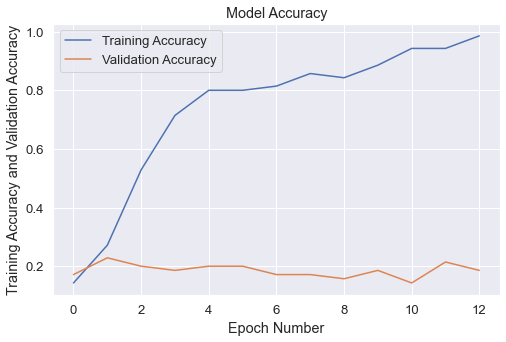

In [52]:
plt.figure(figsize=(8,5))
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.title("Model Accuracy")
plt.ylabel("Training Accuracy and Validation Accuracy")
plt.xlabel("Epoch Number")
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.show()

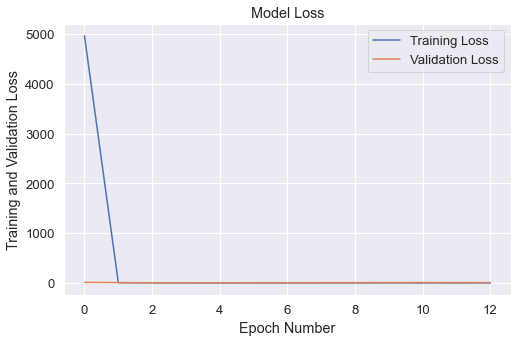

In [53]:
plt.figure(figsize=(8,5))
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title("Model Loss")
plt.ylabel("Training and Validation Loss")
plt.xlabel("Epoch Number")
plt.legend(['Training Loss', 'Validation Loss'])
plt.show()

In [54]:
model.evaluate(test_generator, steps=14, verbose=1)

14/14 [==============================] - 1s 60ms/step - loss: 9.5924 - accuracy: 0.1429 0s - loss: 9.8133 - accuracy: 


[9.592432022094727, 0.1428571492433548]

### Model Prediction

#### Method 1: By individual sampled test images

In [55]:
train_generator.class_indices

{'5': 0, '10': 1, '20': 2, '50': 3, '100': 4, '200': 5, '500': 6}

In [59]:
test_img = image.load_img('69.jpeg', target_size=(112,112))

AttributeError: 'int' object has no attribute 'load_img'

In [ ]:
test_img = image.img_to_array(test_img)

In [ ]:
test_img

In [ ]:
test_img.shape

In [ ]:
test_img_grey = cv2.cvtColor(test_img,cv2.COLOR_BGR2GRAY)

In [ ]:
test_img_grey.shape

In [ ]:
test_img_grey = np.expand_dims(test_img_grey,axis=0)

In [ ]:
test_img_grey.shape

In [ ]:
test_img_grey = test_img_grey/255

In [ ]:
model.predict_classes(test_img_grey)

In [ ]:
model.predict(test_img_grey)

#### Method 2: Predict by batch test images

In [60]:
y_pred = model.predict(test_generator,steps=14,verbose=1)

14/14 [==============================] - 1s 60ms/step


In [61]:
y_pred[:10]

array([[0.03390661, 0.00005794, 0.00064941, 0.00012717, 0.00064876,
        0.00001321, 0.96459687],
       [0.99844486, 0.0010395 , 0.00002008, 0.00000311, 0.00000021,
        0.00048974, 0.00000233],
       [0.00070959, 0.0057013 , 0.3059727 , 0.02106277, 0.00386657,
        0.00038005, 0.6623071 ],
       [0.00170565, 0.00000848, 0.00164936, 0.00003823, 0.00000481,
        0.9965857 , 0.00000772],
       [0.02895019, 0.00000005, 0.00000024, 0.0000019 , 0.00000001,
        0.9710353 , 0.00001222],
       [0.02208412, 0.00122823, 0.50384605, 0.00008791, 0.0006583 ,
        0.00043423, 0.47166112],
       [0.        , 0.00003499, 0.22145814, 0.02489663, 0.        ,
        0.7536103 , 0.        ],
       [0.        , 0.99991596, 0.00000087, 0.00000346, 0.00005204,
        0.0000276 , 0.        ],
       [0.99448884, 0.00061976, 0.0016447 , 0.002873  , 0.00031258,
        0.00002437, 0.00003665],
       [0.09253441, 0.00000013, 0.00000003, 0.00000209, 0.        ,
        0.9074632 , 0.0

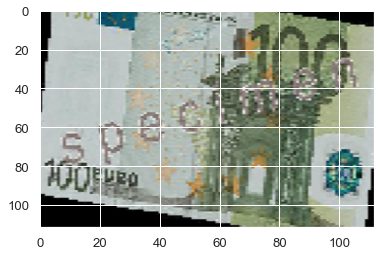

predicted: 500 (Incorrectly classified)


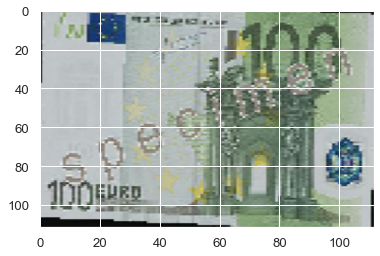

predicted: 20 (Incorrectly classified)


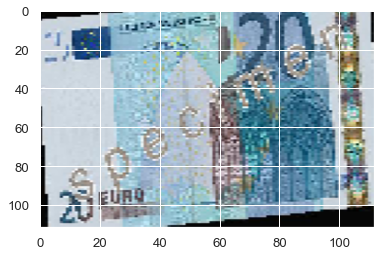

predicted: 500 (Incorrectly classified)


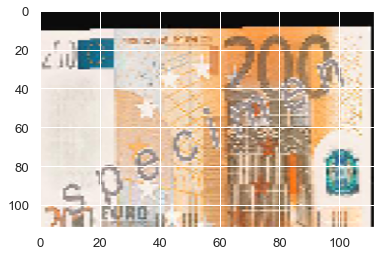

predicted: 200 (Incorrectly classified)


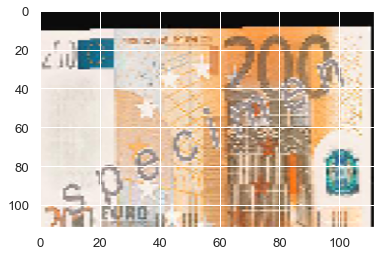

predicted: 200 (Incorrectly classified)


In [62]:
# Plot five random images and their predictions

np.random.seed(0)
numbers = [np.random.randint(0, 69) for i in range(0, 5)]

pred = np.argmax(model.predict(test_generator,35)[numbers], axis=1)

class_labels = train_generator.class_indices

pred_labels = [list(class_labels.keys())[list(class_labels.values()).index(i)] for i in pred]

true_labels = [test_generator.filenames[i].split('/')[0] for i in numbers]

ndx = 0
for i in numbers:
    result_string = 'predicted: {}'.format(pred_labels[ndx])
    if pred_labels[ndx] == true_labels[ndx]:
        result_string += ' (Correctly classified)'
    else:
        result_string += ' (Incorrectly classified)'
    plt.imshow(test_generator[i // 5][0][i % 5].astype(np.uint8), aspect='auto')
    plt.show()
    print(result_string)
    ndx += 1

## Save the Model

In [63]:
#model.save("cnn.h5")

## Transfer Learning

### LeNet Model

#### Preprocessing Training Set

In [ ]:
train_datagen = ImageDataGenerator(rotation_range=30,  # rotate the image 30 degrees
                               width_shift_range=0.1,# Shift the pic width by a max of 10%
                               height_shift_range=0.1,# Shift the pic height by a max of 10%
                               rescale=1./255,# Rescale the image by normalizing it.
                               shear_range=0.2, # Shear means cutting away part of the image (max 20%)
                               zoom_range=0.2, # Zoom in by 20% max
                               horizontal_flip=True,# All horizontal flipping
                               fill_mode= "nearest" # Fill in missing pixels with the nearest filled value
                                )

In [ ]:
batch_size = 2
target_size = (32,32)
classes = ['5','10','20','50','100','200','500']
train_data_dir = 'train'
random_seed = 0

In [ ]:
os.listdir(train_data_dir)

In [ ]:
train_generator = train_datagen.flow_from_directory(train_data_dir, target_size=target_size, classes=classes,
                                                    batch_size=batch_size, seed=random_seed,shuffle=True,
                                                    class_mode='categorical', color_mode='rgb')

In [ ]:
len(train_generator)

In [ ]:
train_generator.class_indices

In [ ]:
train_images, train_labels = next(train_generator)

In [ ]:
train_images.shape

In [ ]:
train_labels.shape

In [ ]:
train_labels

In [ ]:
label_names = {0:'5', 1:'10',2:'20',3:'50',4:'100',5:'200',6:'500'}

#### Preprocessing Validation Set

In [ ]:
batch_size = 2
target_size = (32,32)
classes = ['5','10','20','50','100','200','500']
valid_data_dir = 'validation'
random_seed = 0

In [ ]:
valid_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
valid_generator = valid_datagen.flow_from_directory(valid_data_dir, target_size=target_size, classes=classes,
                                                    batch_size=batch_size, seed=random_seed,
                                                    class_mode='categorical', color_mode='rgb')

In [ ]:
len(valid_generator)

In [ ]:
valid_generator.class_indices

#### Preprocessing Test Set

In [ ]:
batch_size = 2
target_size = (32,32)
classes = ['5','10','20','50','100','200','500']
test_data_dir = 'test'
random_seed = 0

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
test_generator = test_datagen.flow_from_directory(test_data_dir, target_size=target_size, classes=classes,
                                                    batch_size=batch_size, seed=random_seed,
                                                    class_mode='categorical', color_mode='rgb')

In [ ]:
len(test_generator)

In [ ]:
test_generator.batch_size

In [ ]:
lenet = Sequential()

lenet.add(Conv2D(filters=6,kernel_size=(5,5),strides=(1,1),activation='relu',input_shape=(32,32,3)))
lenet.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))

lenet.add(Conv2D(filters=16,kernel_size=(5,5),strides=(1,1),activation='relu',padding='same'))
lenet.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))

lenet.add(Flatten())

lenet.add(Dense(units=120, activation='relu'))

lenet.add(Dense(units=84, activation='relu'))

lenet.add(Dense(units=7,activation='softmax'))

In [ ]:
lenet.summary()

In [ ]:
lenet.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=["accuracy"])

In [ ]:
# using early stopping to exit training if validation loss is not decreasing even after certain epochs (patience)
earlystopping = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=10)

In [ ]:
# save the best model with least validation loss
checkpointer = ModelCheckpoint(filepath='lenetbest.h5',verbose=1,save_best_only=True)

In [ ]:
results = lenet.fit(train_generator,epochs=20,verbose=1,steps_per_epoch=35,
                   validation_data=valid_generator,validation_steps=35, callbacks=[checkpointer, earlystopping])

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch Number")
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.show()

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch Number")
plt.legend(['Training Loss', 'Validation Loss'])
plt.show()

In [ ]:
lenet.save("lenet.h5")

### VGG16 Model

In [ ]:
vgg16 = VGG16(include_top=False, weights='imagenet',classifier_activation='softmax', input_shape=(112,112,3))

In [ ]:
vgg16.summary()

In [ ]:
#Create FC Layer for output

modelvgg16 = models.Sequential()
modelvgg16.add(vgg16)
modelvgg16.add(Flatten())
modelvgg16.add(Dense(units=128,activation='relu'))
modelvgg16.add(Dropout(0.5))
modelvgg16.add(Dense(units=7,activation='softmax'))

In [ ]:
modelvgg16.summary()

In [ ]:
#vgg16.trainable = False

In [ ]:
modelvgg16.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=["accuracy"])

In [ ]:
# using early stopping to exit training if validation loss is not decreasing even after certain epochs (patience)
earlystopping = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=10)

In [ ]:
# save the best model with least validation loss
checkpointer = ModelCheckpoint(filepath='vgg16best.h5',verbose=1,save_best_only=True)

In [ ]:
results = modelvgg16.fit(train_generator,epochs=10,verbose=1,steps_per_epoch=35,
                   validation_data=valid_generator,validation_steps=35, callbacks=[checkpointer, earlystopping])

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch Number")
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.show()

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch Number")
plt.legend(['Training Loss', 'Validation Loss'])
plt.show()

### VGG19 Model

In [ ]:
vgg19 = VGG19(include_top=False, weights='imagenet',classifier_activation='softmax', input_shape=(112,112,3))

In [ ]:
vgg19.summary()

In [ ]:
#Create FC Layer for output

model = models.Sequential()
model.add(vgg19)
model.add(Flatten())
model.add(Dense(units=256,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=7,activation='softmax'))

In [ ]:
model.summary()

In [ ]:
#vgg19.trainable = False

In [ ]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=["accuracy"])

In [ ]:
# using early stopping to exit training if validation loss is not decreasing even after certain epochs (patience)
earlystopping = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=10)

In [ ]:
# save the best model with least validation loss
checkpointer = ModelCheckpoint(filepath='vgg19best.h5',verbose=1,save_best_only=True)

In [ ]:
results = model.fit(train_generator,epochs=10,verbose=1,steps_per_epoch=35,
                   validation_data=valid_generator,validation_steps=35, callbacks=[checkpointer, earlystopping])

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch Number")
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.show()

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch Number")
plt.legend(['Training Loss', 'Validation Loss'])
plt.show()

### Resnet50 Model

In [ ]:
resnet50 = ResNet50(include_top=False,weights='imagenet',input_shape=(112,112,3))

In [ ]:
resnet50.summary()

In [ ]:
# Set parameters in pre-train model to False
for layer in resnet50.layers:
    layer.trainable = False


In [ ]:
#Create FC Layer for output

modelresnet50 = models.Sequential()
modelresnet50.add(resnet50)
modelresnet50.add(Flatten())
modelresnet50.add(Dense(units=128,activation='relu'))
modelresnet50.add(Dropout(0.3))
modelresnet50.add(Dense(units=7,activation='softmax'))

In [ ]:
modelresnet50.summary()

In [ ]:
#resnet50.trainable = False

In [ ]:
modelresnet50.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=["accuracy"])

In [ ]:
# using early stopping to exit training if validation loss is not decreasing even after certain epochs (patience)
earlystopping = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=10)

In [ ]:
# save the best model with least validation loss
checkpointer = ModelCheckpoint(filepath='resnet50best.h5',verbose=1,save_best_only=True)

In [ ]:
results = modelresnet50.fit(train_generator,epochs=30,verbose=1,steps_per_epoch=14,
                   validation_data=valid_generator,validation_steps=14, callbacks=[checkpointer, earlystopping])

### Model Evaluation

In [ ]:
#evaluation = model.evaluate(X_test,y_test)

In [ ]:
model.metrics_names

In [ ]:
hist_df = pd.DataFrame(results.history)
hist_df

In [ ]:
hist_df.to_csv("resnet50history.csv", index=False)

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.title("Model Accuracy")
plt.ylabel("Training Accuracy and Validation Accuracy")
plt.xlabel("Epoch Number")
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.show()

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title("Model Loss")
plt.ylabel("Training and Validation Loss")
plt.xlabel("Epoch Number")
plt.legend(['Training Loss', 'Validation Loss'])
plt.show()

In [ ]:
modelresnet50.evaluate(test_generator, steps=14, verbose=1)